In [459]:
#importing libraries
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import re
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [460]:
df = pd.read_csv('messages.csv')
df.head(25)

subject  \
0             job posting - apple-iss research center   
1                                                 NaN   
2   query : letter frequencies for text identifica...   
3                                                risk   
4                            request book information   
5   call for abstracts : optimality in syntactic t...   
6                 m . a . in scandinavian linguistics   
7   call for papers : linguistics session of the m...   
8                     foreign language in commercials   
9   fulbright announcement : please post / dissemi...   
10                        gala ' 95 : call for papers   
11  bu conf on language development ' 95 - announc...   
12                      korean software for macintosh   
13                                                NaN   
14  simultaneous prepositions and postpositions in...   
15             sum : imperatives without you subjects   
16                                           policies   
17  * * * correction to hellenistic greek announce...   
18                          question on audio samples   
19                                sexism and language   
20                          teaching english in korea   
21                                               free   
22                     email address for w . dressler   
23  dhumbadji ! , journal for the history of language   
24                question : quantitative information   

                                              message  label  
0   content - length : 3386 apple-iss research cen...      0  
1   lang classification grimes , joseph e . and ba...      0  
2   i am posting this inquiry for sergei atamas ( ...      0  
3   a colleague and i are researching the differin...      0  
4   earlier this morning i was on the phone with a...      0  
5   content - length : 4437 call for papers is the...      0  
6   m . a . in scandinavian linguistics at the uni...      0  
7   call for papers linguistics session - - midwes...      0  
8   content - length : 1937 greetings ! i ' m wond...      0  
9   fulbright announcement : please post / dissemi...      0  
10  groningen assembly on language acquisition 199...      0  
11  20th annual boston university conference on la...      0  
12  dear sir / madam , would you please send me an...      0  
13  syntax the antisymmetry of syntax richard s . ...      0  
14  i ' m looking for analyses of nominal construc...      0  
15  content - length : 3573 summary of responses t...      0  
16  moderators ' message a very happy 1995 to all ...      0  
17  a couple of days ago i send an fyi on hellenis...      0  
18  i am looking for audio samples of english spee...      0  
19  re lydie e . meunier 's latest , i did not mea...      0  
20  teaching english in korea the language center ...      0  
21  this is a multi-part message in mime format . ...      1  
22  colleagues - we are trying to contact wolfgang...      0  
23  good news for all subscribers , the december i...      0  
24  hello , there is someone who knows where can i...      0

In [461]:
df.shape

(2893, 3)

In [462]:
df.columns

Index(['subject', 'message', 'label'], dtype='object')

# Visualizing and Preparing the text data

In [463]:
#we have to detect spam from the body of email, so I am dropping the subject column from dataset
df.drop(columns=['subject'],inplace=True)

In [464]:
df.describe()

label
count  2893.000000
mean      0.166263
std       0.372381
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [465]:
#New column for Length of message
df["length"] = df["message"].apply(len)
df.sort_values(by='length', ascending=False).head(25)

message  label  length
1185  g . sampson , ( 1997 ) educating eve : the lan...      0   28649
2667  * * * * * * * * * * * * * * * * * * * * * * * ...      1   28571
2420  * * * * * * * * * * * * * * * * * * * * * * * ...      1   26237
1193  massaro , d . w . ( 1998 ) . perceiving talkin...      0   25743
2487  * * * * * * * * * * * * * * * * * * * * * * * ...      1   25461
2535  * * * * * * * * * * * * * * * * * * * * * * * ...      1   25452
2210  earn over $ 70 , 000 a month in your own home ...      1   25108
942   our research indicates the following material ...      1   24243
2549  you can earn $ 50 , 000 or more in the next 90...      1   24177
1721  this is it ! ! " as s e e n on usa n a t i o n...      1   24083
405   explode your buisiness . . . right now ! this ...      1   23297
1964  hisatsugu kitahara , ( 1997 ) elementary opera...      0   22757
1980  torrego , esther , ( 1998 ) , the dependencies...      0   22535
2281  last thursday night , may 21 , zellig harris d...      0   22477
1042  i re-read newmeyer 's original posting ( date ...      0   21010
1118  our research indicates the following material ...      1   20171
2448  * * * * * * * * * * * * * * * * * * * * * * * ...      1   19859
483   / / / / / / / / / / / / / / / / / / / / / / / ...      1   19663
1094  / / pardon the intrusion , but you may want to...      1   19516
170   hello ! about two months ago i received it aga...      1   19148
278   * * * this is not spam ! * * * my name is matt...      1   18954
138   * * * this is not spam ! * * * my name is matt...      1   18954
2327  [ editor 's note : this is part one of a two p...      0   18934
2508  this is a " one-time message " you were random...      1   18931
267   content - length : 18171 i ' m very grateful t...      0   18866

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

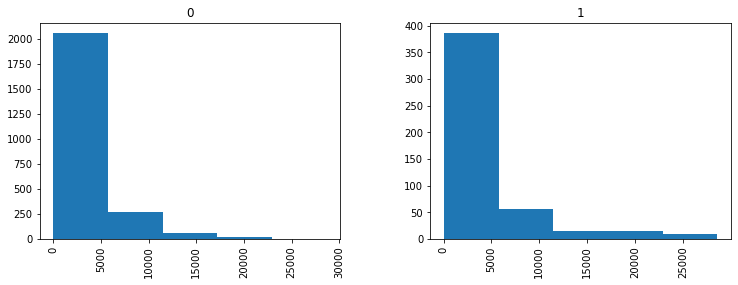

In [466]:
df.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [467]:
#dropping duplicate rows
df.drop_duplicates(inplace = True)

In [468]:
#dataframe shape after dropping duplicates
df.shape

(2859, 3)

In [469]:
df['label'].value_counts()

0    2401
1     458
Name: label, dtype: int64

In [470]:
df.isnull().sum()

message    0
label      0
length     0
dtype: int64

Regular Expressions

In [471]:
# Replace email addresses with 'email'
df['message'] = df['message'] .str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message']  = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['message']  = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [472]:
#Remove Punctuation and Stopwords
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [473]:
df['message'].head(25).apply(process_text)

0     [content, length, numbr, appleiss, research, c...
1     [lang, classification, grimes, joseph, e, barb...
2     [posting, inquiry, sergei, atamas, satamas, um...
3     [colleague, researching, differing, degrees, r...
4     [earlier, morning, phone, friend, mine, living...
5     [content, length, numbr, call, papers, best, g...
6     [scandinavian, linguistics, university, tromso...
7     [call, papers, linguistics, session, midwest, ...
8     [content, length, numbr, greetings, wondering,...
9     [fulbright, announcement, please, post, dissem...
10    [groningen, assembly, language, acquisition, n...
11    [numbrth, annual, boston, university, conferen...
12    [dear, sir, madam, would, please, send, inform...
13    [syntax, antisymmetry, syntax, richard, kayne,...
14    [looking, analyses, nominal, constructions, la...
15    [content, length, numbr, summary, responses, q...
16    [moderators, message, happy, numbr, subscriber...
17    [couple, days, ago, send, fyi, hellenistic

In [474]:
df['clean_length'] = df['message'].str.len()
df.head()

message  label  length  \
0  content - length : numbr apple-iss research ce...      0    2856   
1  lang classification grimes , joseph e . and ba...      0    1800   
2  i am posting this inquiry for sergei atamas ( ...      0    1435   
3  a colleague and i are researching the differin...      0     324   
4  earlier this morning i was on the phone with a...      0    1046   

   clean_length  
0          2895  
1          1872  
2          1475  
3           324  
4          1046

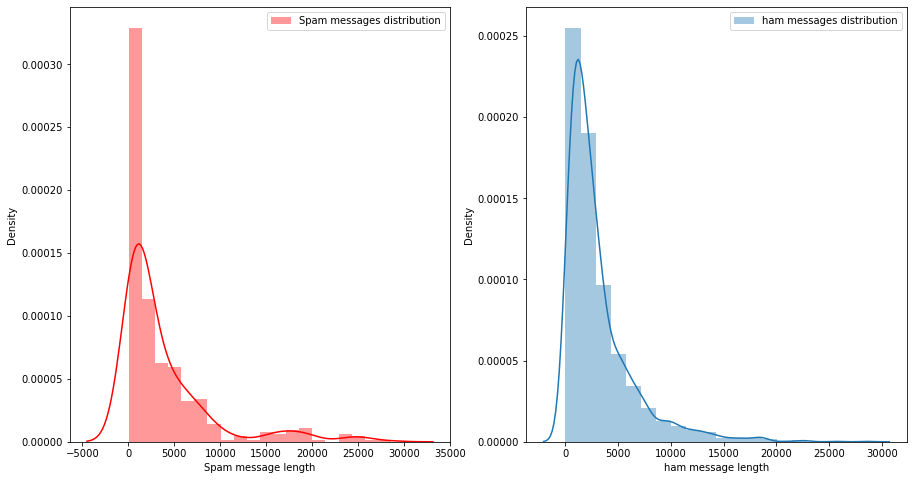

In [475]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham message length')
ax[1].legend()

plt.show()

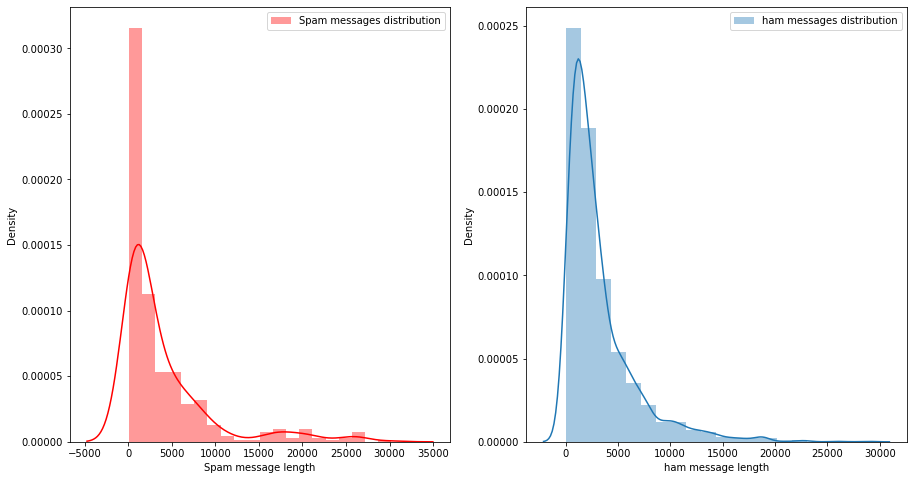

In [476]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham message length')
ax[1].legend()

plt.show()

In [477]:
print ('Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Length 9212855
Clean Length 9467025


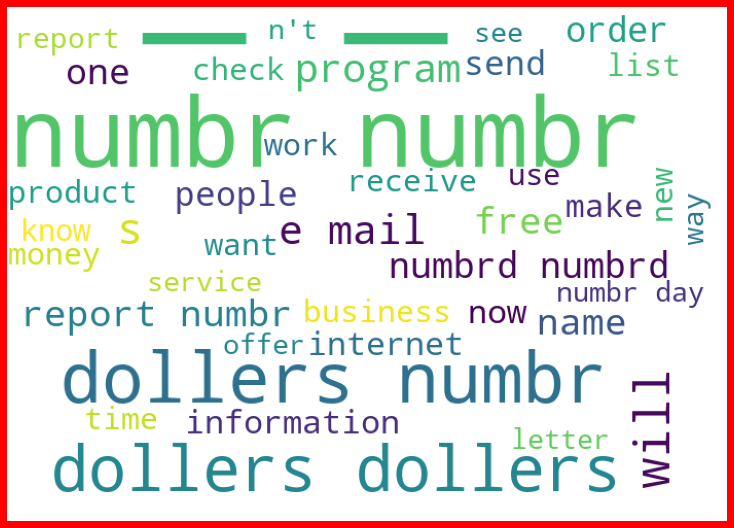

In [478]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud

spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

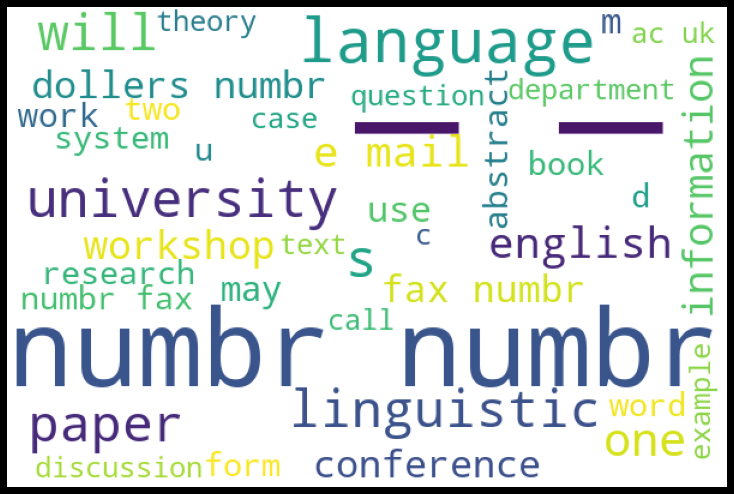

In [479]:
#Getting sense of loud words in hams
hams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=40).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [480]:
#output variable
y=df['label']

In [481]:
#input variable
x=df['message']

# Feature extraction process

In [482]:
#Convert text into vectors using Bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [493]:
messages_bow = CountVectorizer(analyzer=process_text, ngram_range=(1, 2)).fit_transform(x)

In [494]:
print(messages_bow)

  (0, 10274)	1
  (0, 29043)	1
  (0, 35898)	9
  (0, 2674)	1
  (0, 43334)	5
  (0, 7836)	3
  (0, 54125)	2
  (0, 13767)	1
  (0, 32658)	1
  (0, 26263)	1
  (0, 54685)	1
  (0, 2672)	3
  (0, 9735)	1
  (0, 24037)	1
  (0, 24734)	2
  (0, 50158)	2
  (0, 45558)	2
  (0, 34390)	2
  (0, 53742)	2
  (0, 47084)	4
  (0, 29995)	2
  (0, 30157)	2
  (0, 46105)	1
  (0, 48155)	5
  (0, 45572)	1
  :	:
  (2858, 21998)	1
  (2858, 27575)	1
  (2858, 14665)	1
  (2858, 38154)	1
  (2858, 21868)	1
  (2858, 51297)	1
  (2858, 7680)	2
  (2858, 55499)	2
  (2858, 32360)	1
  (2858, 55288)	1
  (2858, 14791)	1
  (2858, 50464)	1
  (2858, 3596)	1
  (2858, 43336)	1
  (2858, 31322)	1
  (2858, 33266)	2
  (2858, 3207)	1
  (2858, 7167)	1
  (2858, 23730)	1
  (2858, 26065)	1
  (2858, 38981)	1
  (2858, 8227)	1
  (2858, 30102)	1
  (2858, 26183)	2
  (2858, 32417)	2


In [495]:
messages_bow.shape

(2859, 57820)

In [496]:
messages_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [497]:
#Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [501]:
tfidf_transformer = TfidfTransformer()

In [590]:
X_tfidf = tfidf_transformer.fit_transform(messages_bow)

In [591]:
print(X_tfidf.shape)

(2859, 57820)


# Instantiate MultinomialNB classifier and SVM classifier : Training the classifiers.

I have trained two models here namely Naive Bayes classifier and Support Vector Machines (SVM). Naive Bayes classifier is a conventional and very popular method for document classification problem. It is a supervised probabilistic classifier based on Bayes theorem assuming independence between every pair of features. SVMs are supervised binary classifiers which are very effective when you have higher number of features. The goal of SVM is to separate some subset of training data from rest called the support vectors (boundary of separating hyper-plane). The decision function of SVM model that predicts the class of the test data is based on support vectors and makes use of a kernel trick.

# Train-Test using TfidfTransformed input (Naive Bayes Algorithm)

In [504]:
from sklearn.model_selection import train_test_split

#As both the classes are highly imbalanced, I have used stratify for label column, so that the rows are to be selected in equal proportion from both the classes for validation purpose and hence no overfitting should be there

In [505]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size = 0.20, random_state = 42)

Training classifier

In [506]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [507]:
print(classifier.predict(x_train))
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [508]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Performance evaluation using multiple metrics

In [509]:
pred = classifier.predict(x_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1921
           1       1.00      0.24      0.39       366

    accuracy                           0.88      2287
   macro avg       0.94      0.62      0.66      2287
weighted avg       0.89      0.88      0.85      2287

Confusion Matrix: 
 [[1921    0]
 [ 278   88]]

Accuracy:  0.8784433756012243


In [510]:
print('Predicted value: ',classifier.predict(x_test))
print('Actual value: ',y_test.values)

Predicted value:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

Classification report and F1 Score

In [511]:
pred = classifier.predict(x_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       480
           1       1.00      0.15      0.26        92

    accuracy                           0.86       572
   macro avg       0.93      0.58      0.59       572
weighted avg       0.88      0.86      0.82       572

Confusion Matrix: 
 [[480   0]
 [ 78  14]]

Accuracy:  0.8636363636363636


In [539]:
from sklearn import metrics
metrics.f1_score(y_test, pred)

0.983957219251337

ROC-AUC

In [512]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
classifier.fit(x_train,y_train)
predy=classifier.predict(x_test)
y_pred_prob=classifier.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier(TfidfTransformer)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predy)
print(auc_score)

0.5760869565217391


Learning Curves

In [542]:
from sklearn.model_selection import learning_curve

In [548]:
from sklearn.model_selection import StratifiedShuffleSplit

In [550]:
sample_space = np.linspace(500, len(df) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=classifier,
    X=X_tfidf,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)

In [551]:
def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )

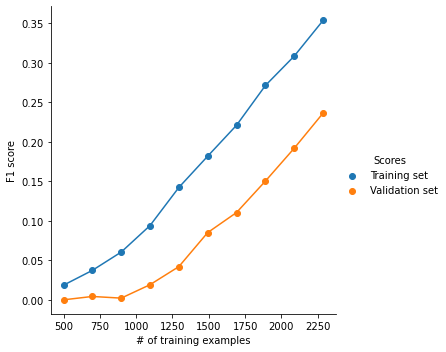

In [552]:
g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

Cross Validation Score

In [557]:
from sklearn.model_selection import GridSearchCV

In [559]:
from sklearn.model_selection import cross_val_score

In [560]:
param_grid = [{'alpha': (0,1),'fit_prior': ('True','False')}]

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=X_tfidf,
    y=y,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

scores

array([0.94857143, 0.95505618, 0.94252874, 0.94857143, 0.9047619 ,
       0.96045198, 0.93714286, 0.95454545, 0.90588235, 0.95505618])

In [574]:
scores.mean()

0.9663943479192663

# Train-Test using TfidfTransformed input (SVM Algorithm)

Classifier training

In [513]:
from sklearn.svm import SVC

In [533]:
clf = SVC(kernel='linear',probability=True).fit(x_train, y_train)

In [515]:
print(clf.predict(x_train))
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Performance evaluation using multiple metrics

In [516]:
pred1 = clf.predict(x_train)
print(classification_report(y_train ,pred1 ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred1))
print()
print('Accuracy: ', accuracy_score(y_train,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       1.00      1.00      1.00       366

    accuracy                           1.00      2287
   macro avg       1.00      1.00      1.00      2287
weighted avg       1.00      1.00      1.00      2287

Confusion Matrix: 
 [[1921    0]
 [   0  366]]

Accuracy:  1.0


Classification report and F1 Score

In [517]:
pred2 = clf.predict(x_test)
print(classification_report(y_test ,pred2))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred2))
print()
print('Accuracy: ', accuracy_score(y_test,pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       480
           1       0.99      0.92      0.96        92

    accuracy                           0.99       572
   macro avg       0.99      0.96      0.97       572
weighted avg       0.99      0.99      0.99       572

Confusion Matrix: 
 [[479   1]
 [  7  85]]

Accuracy:  0.986013986013986


In [538]:
from sklearn import metrics
metrics.f1_score(y_test, pred2)

0.9462365591397849

AUC-ROC

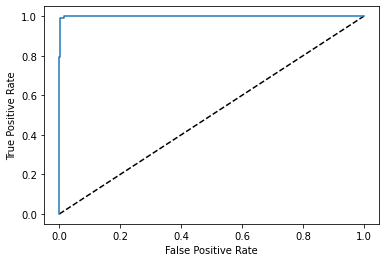

0.9609148550724637


In [518]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
clf.fit(x_train,y_train)
predy=clf.predict(x_test)
y_pred_prob=clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVM Algorithm TfidfTransformer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predy)
print(auc_score)

Learning Curves

In [561]:
sample_space = np.linspace(500, len(df) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=clf,
    X=X_tfidf,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)

In [562]:
def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )

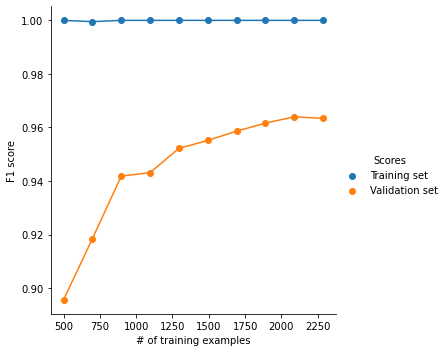

In [563]:
g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

Cross Validation Score

In [ ]:
scores = cross_val_score(
    estimator=grid_search,
    X=X_tfidf,
    y=y,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

scores

In [566]:
scores.mean()

0.9663943479192663

# Train-Test using Bag of words input (Naive Bayes Algorithm)

In [519]:
from sklearn.model_selection import train_test_split

In [520]:
x1_train, x1_test, y1_train, y1_test = train_test_split(messages_bow, y, stratify=y, test_size = 0.20, random_state = 42)

Classifier Training

In [521]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x1_train, y1_train)

MultinomialNB()

In [522]:
print(classifier.predict(x1_train))
print(y1_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Performance evaluation using multiple metrics

In [523]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [524]:
pred = classifier.predict(x1_train)
print(classification_report(y1_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y1_train,pred))
print()
print('Accuracy: ', accuracy_score(y1_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.98      0.99      0.99       366

    accuracy                           1.00      2287
   macro avg       0.99      1.00      0.99      2287
weighted avg       1.00      1.00      1.00      2287

Confusion Matrix: 
 [[1914    7]
 [   2  364]]

Accuracy:  0.9960647135986008


In [525]:
print('Predicted value: ',classifier.predict(x1_test))
print('Actual value: ',y1_test.values)

Predicted value:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 

Classification report and F1 Score

In [526]:
pred = classifier.predict(x1_test)
print(classification_report(y1_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y1_test,pred))
print()
print('Accuracy: ', accuracy_score(y1_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       480
           1       0.97      1.00      0.98        92

    accuracy                           0.99       572
   macro avg       0.98      1.00      0.99       572
weighted avg       0.99      0.99      0.99       572

Confusion Matrix: 
 [[477   3]
 [  0  92]]

Accuracy:  0.9947552447552448


In [537]:
from sklearn import metrics
metrics.f1_score(y1_test, pred)

0.983957219251337

AUC ROC

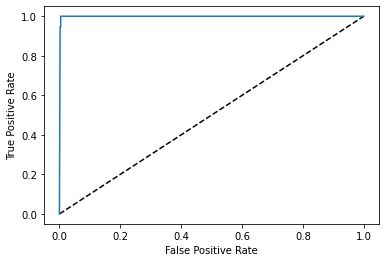

0.9968750000000001


In [527]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
classifier.fit(x1_train,y1_train)
predy1=classifier.predict(x1_test)
y1_pred_prob=classifier.predict_proba(x1_test)[:,1]
fpr,tpr,thresholds=roc_curve(y1_test,y1_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier(Bag of words)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y1_test,predy1)
print(auc_score)

Learning Curve

In [553]:
sample_space = np.linspace(500, len(df) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=classifier,
    X=messages_bow,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)

In [554]:
def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )

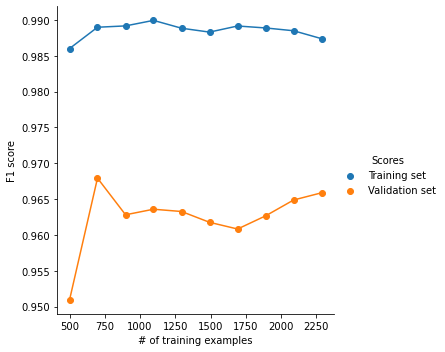

In [555]:
g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

GridSearchCV and Cross Validation Score

In [567]:
param_grid = [{'alpha': (0,1),'fit_prior': ('True','False')}]

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=messages_bow,
    y=y,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

scores

array([0.95698925, 0.97326203, 0.9726776 , 0.98395722, 0.95833333,
       0.97326203, 0.98378378, 0.97849462, 0.97802198, 0.96808511])

In [568]:
scores.mean()

0.9726866951540691

# Train-Test using Bag of words input (SVM Algorithm)

In [528]:
from sklearn.svm import SVC

Classifier training

In [529]:
clf = SVC(kernel='linear').fit(x1_train, y1_train)

# Performance evaluation using multiple metrics

In [530]:
pred1 = clf.predict(x1_train)
print(classification_report(y1_train ,pred1 ))
print('Confusion Matrix: \n',confusion_matrix(y1_train,pred1))
print()
print('Accuracy: ', accuracy_score(y1_train,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       1.00      1.00      1.00       366

    accuracy                           1.00      2287
   macro avg       1.00      1.00      1.00      2287
weighted avg       1.00      1.00      1.00      2287

Confusion Matrix: 
 [[1921    0]
 [   0  366]]

Accuracy:  1.0


Classification report and F1 Score

In [531]:
pred2 = clf.predict(x1_test)
print(classification_report(y1_test ,pred2))
print('Confusion Matrix: \n', confusion_matrix(y1_test,pred2))
print()
print('Accuracy: ', accuracy_score(y1_test,pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       480
           1       0.94      0.96      0.95        92

    accuracy                           0.98       572
   macro avg       0.96      0.97      0.97       572
weighted avg       0.98      0.98      0.98       572

Confusion Matrix: 
 [[474   6]
 [  4  88]]

Accuracy:  0.9825174825174825


In [536]:
from sklearn import metrics
metrics.f1_score(y1_test, pred2)

0.9462365591397849

ROC-AUC

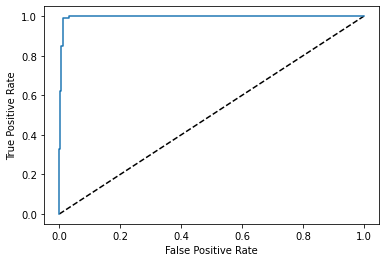

0.9720108695652174


In [534]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
clf.fit(x1_train,y1_train)
predy1=clf.predict(x1_test)
y1_pred_prob=clf.predict_proba(x1_test)[:,1]
fpr,tpr,thresholds=roc_curve(y1_test,y1_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVM Algorithm (Bag of words)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y1_test,predy1)
print(auc_score)

Learning Curves

In [569]:
sample_space = np.linspace(500, len(df) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=clf,
    X=messages_bow,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)

In [570]:
def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )

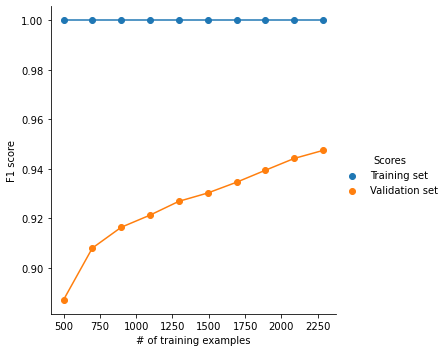

In [571]:
g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

Cross Validation Score

In [602]:
scores = cross_val_score(
    estimator=clf,
    X=messages_bow,
    y=y,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

scores

array([0.96703297, 0.96703297, 0.96089385, 0.97849462, 0.9726776 ,
       0.94240838, 0.94054054, 0.94565217, 0.95238095, 0.93684211])

In [603]:
scores.mean()

0.9563956157159913

# Conclusions